# Week 9

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Cleaning The Data

In [76]:
df = pd.read_excel("Healthcare_dataset.xlsx", sheet_name=1)

df.describe()

# 2 Numeric Values

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


Since we know our data has unknown values let's turn them into NaN values.

In [77]:
def convert_none(x):
    """
    Function for converting the unknown values to NaN
    """
    if x in ["Unknown", "Other/Unknown"]:
        return None
    else:
        return x

df = df.applymap(convert_none) # Applying the function to whole dataframe

### Percentages of the NaN Values

In [78]:
none_columns = df.isna().sum()

percent_none = none_columns[none_columns > 0] / len(df) * 100

percent_none

Race                        2.832944
Ethnicity                   2.657710
Region                      1.752336
Ntm_Speciality              9.053738
Risk_Segment_During_Rx     43.720794
Tscore_Bucket_During_Rx    43.720794
Change_T_Score             43.720794
Change_Risk_Segment        65.099299
dtype: float64

### Binary Values

In [79]:
# Binary Values

for name, column in df.items():
    if column.nunique() == 2:
        print(name)

Persistency_Flag
Gender
Ethnicity
Ntm_Specialist_Flag
Gluco_Record_Prior_Ntm
Gluco_Record_During_Rx
Dexa_During_Rx
Frag_Frac_Prior_Ntm
Frag_Frac_During_Rx
Risk_Segment_Prior_Ntm
Tscore_Bucket_Prior_Ntm
Risk_Segment_During_Rx
Tscore_Bucket_During_Rx
Adherent_Flag
Idn_Indicator
Injectable_Experience_During_Rx
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms
Comorb_Encounter_For_Immunization
Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx
Comorb_Vitamin_D_Deficiency
Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified
Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx
Comorb_Long_Term_Current_Drug_Therapy
Comorb_Dorsalgia
Comorb_Personal_History_Of_Other_Diseases_And_Conditions
Comorb_Other_Disorders_Of_Bone_Density_And_Structure
Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias
Comorb_Osteoporosis_without_current_pathological_fracture
Comorb_Personal_history_of_malignant_neoplasm
Comorb_Gastro_esophageal_reflux_disease
Concom_Cholestero

In [80]:
# Numeric Values

df.select_dtypes("int64").columns.to_list()

['Dexa_Freq_During_Rx', 'Count_Of_Risks']

In [81]:
# Describe Numeric Values
df.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


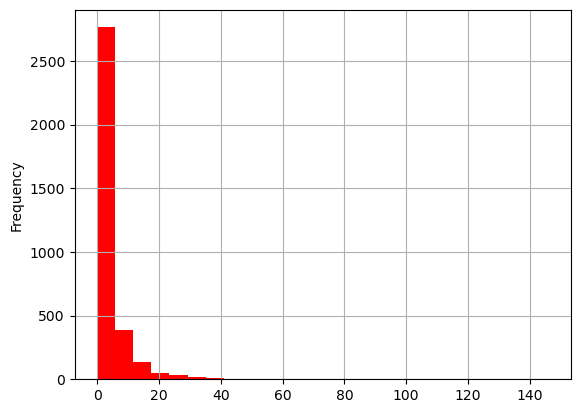

In [82]:
df["Dexa_Freq_During_Rx"].plot.hist(bins=25, color="Red")
plt.grid()
plt.show()

In order to Make data closer to normal distrubition we will use log transformation (I added a constant to get 
rid of the infinite values)

In [83]:
df["Dexa_Freq_During_Rx"] = np.log(df["Dexa_Freq_During_Rx"].apply(lambda x: x+1).values)

In [84]:
df["Dexa_Freq_During_Rx"]

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
3419    0.000000
3420    0.000000
3421    2.079442
3422    0.000000
3423    0.000000
Name: Dexa_Freq_During_Rx, Length: 3424, dtype: float64

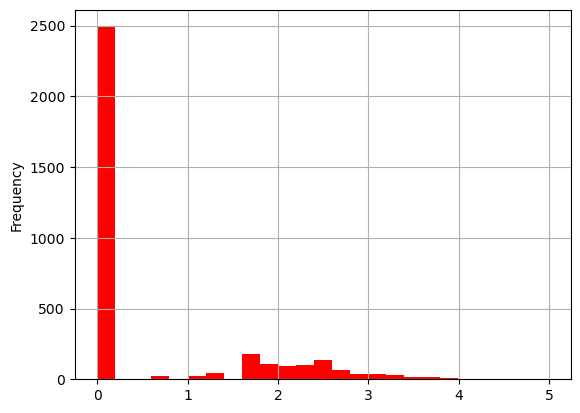

In [85]:
# More like a normal distribution.
df["Dexa_Freq_During_Rx"].plot.hist(bins=25, color="Red")
plt.grid()
plt.show()

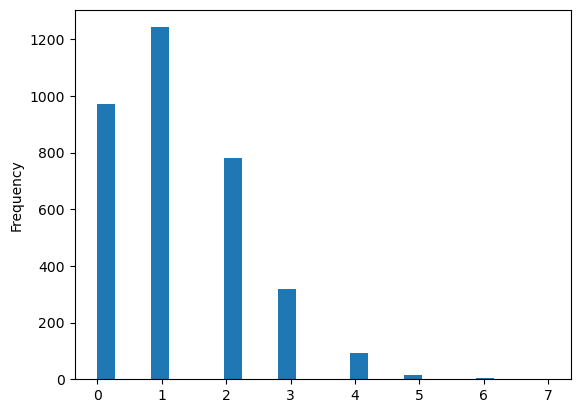

In [86]:
df["Count_Of_Risks"].plot.hist(bins=25)
plt.show()

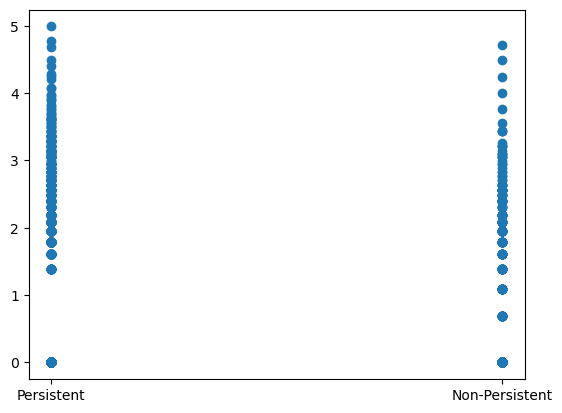

In [87]:
plt.scatter(df["Persistency_Flag"], df["Dexa_Freq_During_Rx"])
plt.show()

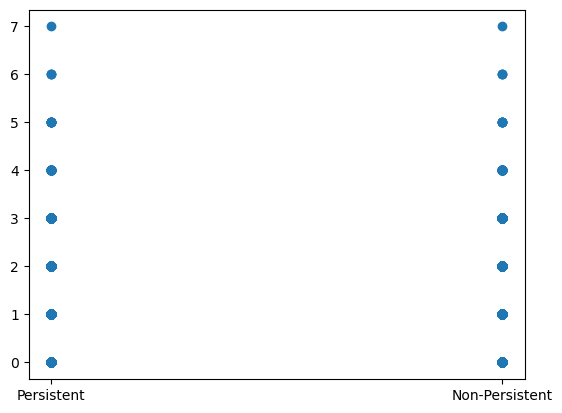

In [88]:
plt.scatter(df["Persistency_Flag"], df["Count_Of_Risks"])
plt.show()

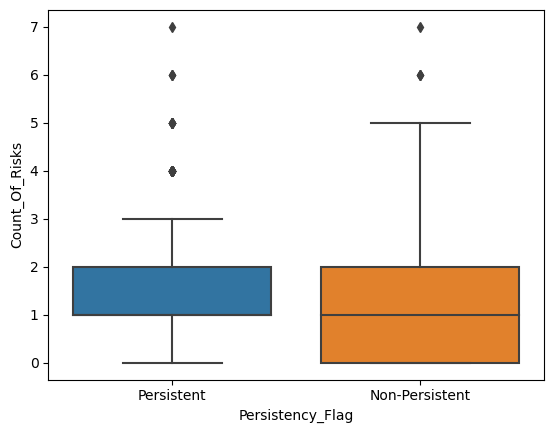

In [89]:
sns.boxplot(data=df, x="Persistency_Flag", y="Count_Of_Risks")
plt.show()

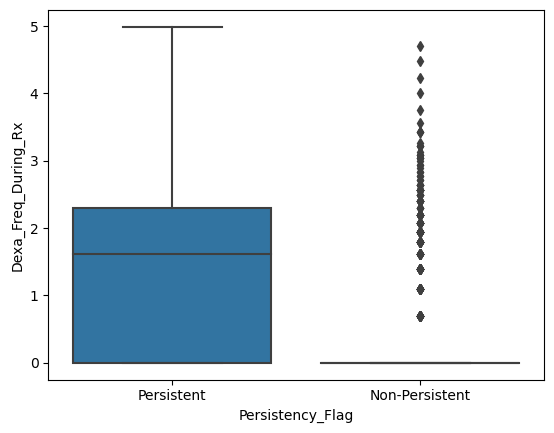

In [90]:
sns.boxplot(data=df, x="Persistency_Flag", y="Dexa_Freq_During_Rx")
plt.show()

In [91]:
def find_outliers_IQR(df):
   """ Function for finding the outliers """
   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-2*IQR)) | (df>(q3+2*IQR)))]

   return outliers

In [94]:
find_outliers_IQR(df["Count_Of_Risks"])

817     7
1059    7
Name: Count_Of_Risks, dtype: int64

In [95]:
find_outliers_IQR(df["Dexa_Freq_During_Rx"])

541     4.406719
1901    4.709530
1993    4.488636
2013    4.204693
2028    4.488636
2033    4.779123
2132    4.248495
2176    4.234107
2215    4.990433
2603    4.691348
2751    4.290459
Name: Dexa_Freq_During_Rx, dtype: float64

## 1 - Getting rid of NaN Values and The outliers

In [96]:
df = df.copy()

none_columns = df.isna().sum()

percent_none = none_columns[none_columns > 0] / len(df) * 100

percent_none

Race                        2.832944
Ethnicity                   2.657710
Region                      1.752336
Ntm_Speciality              9.053738
Risk_Segment_During_Rx     43.720794
Tscore_Bucket_During_Rx    43.720794
Change_T_Score             43.720794
Change_Risk_Segment        65.099299
dtype: float64

* Since the NaN percentage of the 4 columns are above 40 percent we will get rid of those columns in order to not toaffect the data.

In [97]:
df = df.drop(columns=["Risk_Segment_During_Rx",
                      "Tscore_Bucket_During_Rx",
                      "Change_T_Score",
                      "Change_Risk_Segment",])

In [98]:
len(df.columns)

65

* Others are categorical data so I will impute them with the most freaquent value.

In [99]:
def fillnamode(df):
    """Fuction for filling the NaN with the most freaquent value"""
    most_frqnt_vlue = df.mode()[0]
    df = df.fillna(most_frqnt_vlue)
    return df

In [100]:
df["Race"] = fillnamode(df["Race"])
df["Ethnicity"] = fillnamode(df["Ethnicity"])
df["Region"] = fillnamode(df["Region"])
df["Ntm_Speciality"] = fillnamode(df["Ntm_Speciality"])

### Finding the outliers And Dropping Them

In [101]:
outliers = find_outliers_IQR(df["Dexa_Freq_During_Rx"])

In [102]:
df.drop(index=outliers.index, inplace=True)

In [103]:
len(df)

3413

In [104]:
df["Count_Of_Risks"].value_counts()

1    1237
0     965
2     780
3     317
4      91
5      15
6       6
7       2
Name: Count_Of_Risks, dtype: int64

df

### 2nd Approach Using WOE / IV For Logistic Regression (Weight Of Evidence, Information Value)

In [108]:
import numpy as np

iv = pd.Series()


for i in range(2, len(df.columns)):
    

    df_woe = df.pivot_table(index=df.columns[i], 
                            columns=["Persistency_Flag"],
                            values="Ptid",
                            aggfunc="count")

    woe_iv = pd.DataFrame(columns=["woe", "iv"])
    for index, value in df_woe.iterrows():
        prcnt_bad = value["Non-Persistent"] / df_woe["Non-Persistent"].sum()
        prcnt_good = value["Persistent"] / df_woe["Persistent"].sum()
        woe_iv.loc[index, "woe"] =  np.log(prcnt_good / prcnt_bad) 
        woe_iv.loc[index, "iv"] =  woe_iv.loc[index, "woe"] * (prcnt_good - prcnt_bad)
        df[df.columns[i]].replace(index, woe_iv.loc[index, "woe"], inplace=True)
    df_woe_iv = pd.concat([df_woe, woe_iv], axis=1)

    df_woe_iv.loc["Total"] = df_woe_iv.sum()
    iv[df.columns[i]] = df_woe_iv.loc["Total", "iv"]

    

df_woe_iv

C:\Users\ayber\AppData\Local\Temp\ipykernel_14640\1818610269.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  iv = pd.Series()


,Non-Persistent,Persistent,woe,iv
0,656,309,-0.2434,0.01618
1,770,467,0.009358,0.000032
2,467,313,0.109293,0.002765
3,179,138,0.249287,0.005925
4,50,41,0.310969,0.00266
5,6,9,0.914885,0.003853
6,3,3,0.509419,0.000476
7,1,1,0.509419,0.000159
Total,2132,1281,2.369231,0.03205


If Information Value is less then 0.02 The Feature is Useless.

In [68]:
iv.apply(round, ndigits=2).sort_values(ascending=False)

Dexa_Freq_During_Rx                                       0.98
Dexa_During_Rx                                            0.75
Comorb_Long_Term_Current_Drug_Therapy                     0.52
Comorb_Encounter_For_Immunization                         0.37
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms    0.37
                                                          ... 
Risk_Type_1_Insulin_Dependent_Diabetes                    0.00
Gluco_Record_Prior_Ntm                                    0.00
Frag_Frac_Prior_Ntm                                       0.00
Risk_Segment_Prior_Ntm                                    0.00
Gender                                                    0.00
Length: 63, dtype: float64

### Columns Which has a information value more than 0.02

In [69]:


iv[iv>0.02] 

Region                                                                0.025565
Ntm_Speciality                                                        0.199183
Ntm_Specialist_Flag                                                   0.082064
Ntm_Speciality_Bucket                                                 0.136566
Gluco_Record_During_Rx                                                0.197153
Dexa_Freq_During_Rx                                                   0.984861
Dexa_During_Rx                                                        0.754214
Frag_Frac_During_Rx                                                   0.039780
Adherent_Flag                                                         0.063742
Idn_Indicator                                                         0.085094
Injectable_Experience_During_Rx                                       0.056867
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms                0.372186
Comorb_Encounter_For_Immunization                   

Dropping the columns which has  less information value than 0.02

In [70]:
df.drop(columns = iv[iv<0.02].index, inplace=True)

In [71]:
df.head()

,Ptid,Persistency_Flag,Region,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_During_Rx,...,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Smoking_Tobacco,Risk_Vitamin_D_Insufficiency,Count_Of_Risks
0,P1,Persistent,0.072988,-0.234242,-0.248592,-0.239534,-0.280921,-0.470083,-0.470083,-0.074161,...,-0.149169,-0.193438,-0.226822,-0.191673,-0.147671,-0.194084,-0.160423,-0.125418,-0.156827,-0.228383
1,P2,Non-Persistent,0.072988,-0.234242,-0.248592,-0.239534,-0.280921,-0.470083,-0.470083,-0.074161,...,-0.149169,-0.193438,-0.226822,-0.191673,-0.147671,-0.194084,-0.160423,-0.125418,-0.156827,-0.228383
2,P3,Non-Persistent,-0.188352,-0.234242,-0.248592,-0.239534,-0.280921,-0.470083,-0.470083,-0.074161,...,-0.149169,-0.193438,-0.226822,-0.191673,-0.147671,-0.194084,-0.160423,-0.125418,-0.156827,0.080197
3,P4,Non-Persistent,-0.188352,-0.234242,-0.248592,-0.239534,0.713455,-0.470083,-0.470083,-0.074161,...,-0.149169,-0.193438,-0.226822,-0.191673,-0.147671,-0.194084,1.329567,0.485623,-0.156827,0.011912
4,P5,Non-Persistent,-0.188352,-0.234242,-0.248592,-0.239534,0.713455,-0.470083,-0.470083,-0.074161,...,0.363634,-0.193438,-0.226822,-0.191673,-0.147671,-0.194084,-0.160423,0.485623,-0.156827,0.011912


In [ ]:
len(df)